# 1. Audio exploration:

In [ ]:
#Importing libraries
import os
import librosa
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import soundfile as sf
import numpy as np

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Defining the commun paths :

In [ ]:
# Defining the base path
base_path = "/content/drive/MyDrive/PFA/"

# Defining the subfolder paths
audio_path = base_path + "wav/"  # For our audio files
features_path = base_path + "extracted_features_labeled_scaled.csv"  # For the CSV file that we will be working on
models_path = base_path + "models/"  # To save trained models
spectrograms_path = base_path + "spectrograms/"  # to store spectrograms


In [ ]:
# Defining the path to the audio files
audio_files_path = base_path + "wav/"  #The folder containing all audio files
audio_files = [os.path.join(audio_files_path, f) for f in os.listdir(audio_files_path) if f.endswith('.wav')]
                                                                                          #this is for filtering only the .wav files
print(audio_files)# audio_files have the path of every audio
print(len(audio_files))#the number of audio files

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/PFA/wav/'

Number of audio files per speaker:
speaker_id
03    49
08    58
09    43
10    38
11    55
12    35
13    61
14    69
15    56
16    71
Name: count, dtype: int64


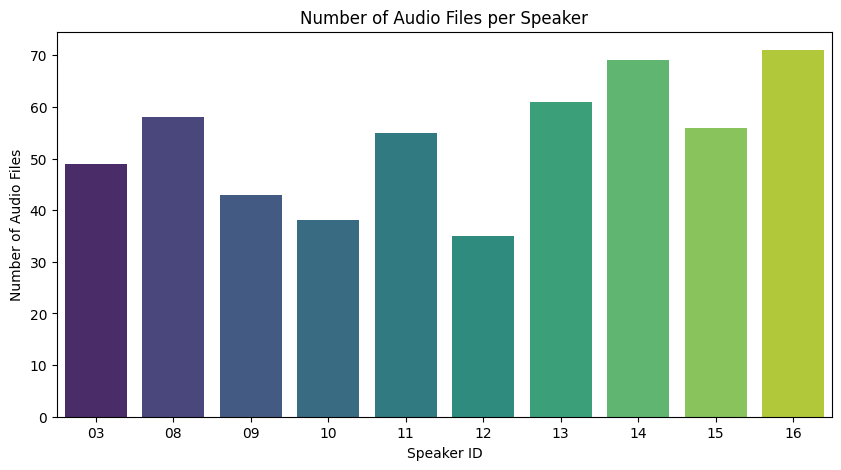

In [ ]:
# Extracting speaker IDs (the first 2 characters of filename(EMODB dataset))
speaker_ids = [os.path.basename(f)[:2] for f in audio_files]

# Creating a DataFrame to count occurrences of speakers
df_speakers = pd.DataFrame(speaker_ids, columns=["speaker_id"])
speaker_counts = df_speakers["speaker_id"].value_counts().sort_index()

#Printing the speakers' audio numbers
print("Number of audio files per speaker:")
print(speaker_counts)

# Plotting speakers' audios distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=speaker_counts.index, y=speaker_counts.values, hue=speaker_counts.index, palette="viridis", legend=False)
plt.xlabel("Speaker ID")
plt.ylabel("Number of Audio Files")
plt.title("Number of Audio Files per Speaker")
plt.show()

=> we notice that some speakers have more recordings than others.

In [ ]:
import IPython.display as ipd

# Picking a sample audio
sample_audio = os.path.join(audio_files_path, audio_files[1])

# Listening to a sample audio
ipd.Audio(sample_audio)


**Visualizing the Waveform**

**LibROSA** is a Python package for music and audio analysis. It provides a wide array of functions and tools for tasks such as loading audio files, computing spectrograms, extracting features, and visualizing audio data. Developed by Brian McFee and the LabROSA research group at Columbia University, LibROSA has become a popular choice among researchers, engineers, and enthusiasts for its simplicity, flexibility, and efficiency.
"[https://medium.com/@noorfatimaafzalbutt/librosa-a-comprehensive-guide-to-audio-analysis-in-python-3f74fbb8f7f3](https://)"

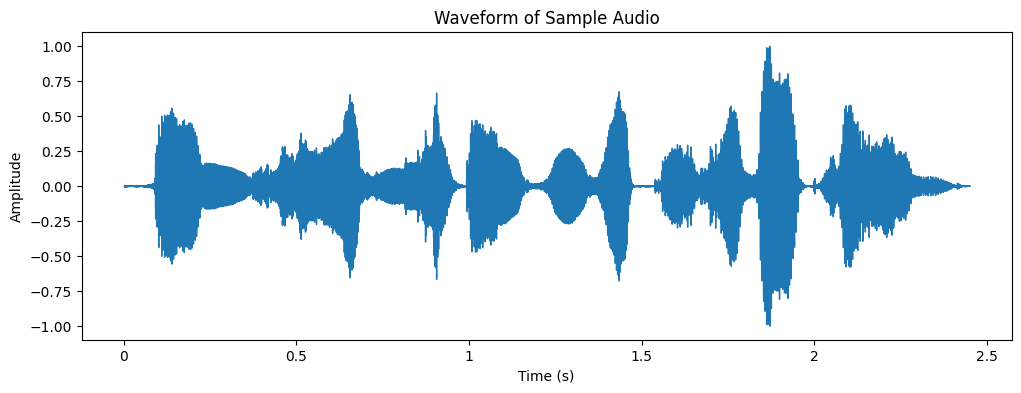

In [ ]:
import librosa
import librosa.display
import numpy as np

# Loading the sample audio
y, sr = librosa.load(sample_audio, sr=None)

# Plotting waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of Sample Audio")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


**Visualizing the Spectrogram**

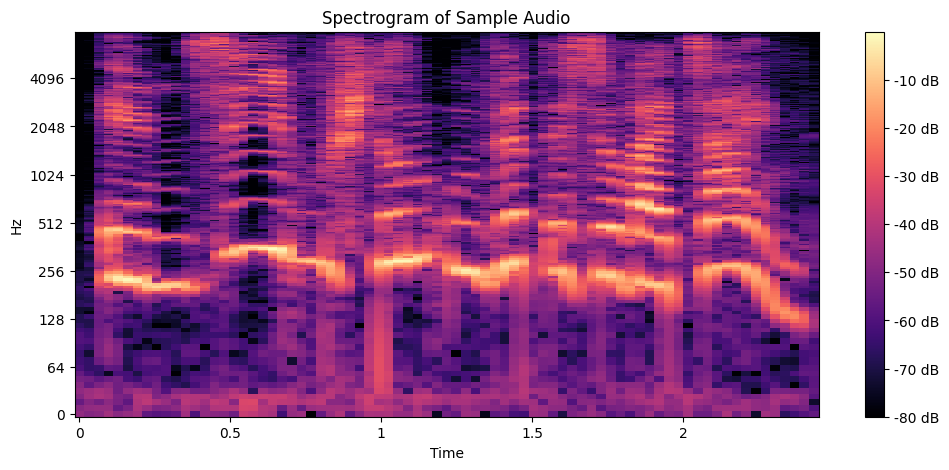

In [ ]:
import librosa.display

# Compute Short-Time Fourier Transform to get the spectogram (STFT)
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

# Plotting the spectrogram
plt.figure(figsize=(12, 5))
librosa.display.specshow(D, sr=sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram of Sample Audio")
plt.show()


The brighter the color the more that frequency contributes in that specific time, The spectrogram combines time and frequency information, displaying frequency contributions over time. This visualization aids in recognizing patterns and variations in complex audio signals.

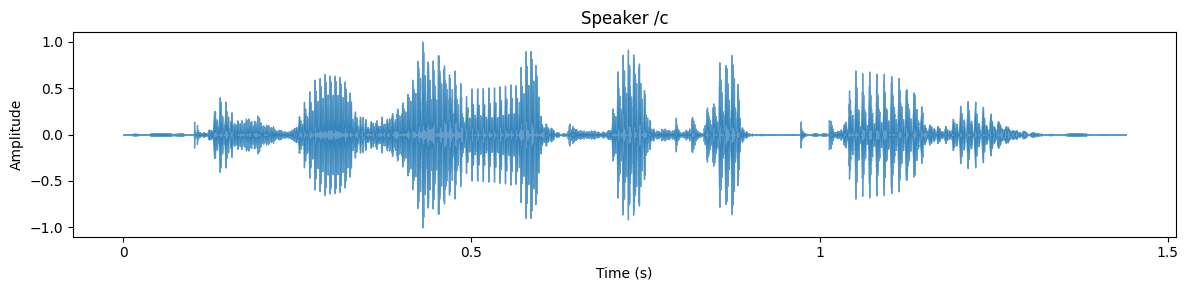

In [ ]:
# Extract speaker IDs
speaker_files = {}
for f in audio_files:
    speaker_id = f[:2]  # First 2 characters are speaker ID
    if speaker_id not in speaker_files:
        speaker_files[speaker_id] = os.path.join(audio_files_path, f)  # Save one file per speaker

#Plotting waveforms for each speaker
num_speakers = len(speaker_files)
plt.figure(figsize=(12, 3 * num_speakers))  # Adjust figure size

for i, (speaker_id, file_path) in enumerate(speaker_files.items(), 1):
    y, sr = librosa.load(file_path, sr=None)  # Load audio


    plt.subplot(num_speakers, 1, i)  # Create subplots
    librosa.display.waveshow(y, sr=sr, alpha=0.7)
    plt.title(f"Speaker {speaker_id}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

plt.tight_layout()  # Adjust layout for better visibility
plt.show()


#2. Audio Preprocessing





▶**Checking Sample Rate and Channel Information Using Librosa**

we are going to use soundfile to check audio propreties to ensure audio consistency (if we find mixed files(mono and stereo) it might be a potential problem in feature extraction)

In [ ]:
import soundfile as sf

#The Function for checking audio properties using Soundfile
def check_audio_properties_sf(file_path):
    with sf.SoundFile(file_path) as f:
        sample_rate = f.samplerate
        channels = f.channels

    print(f"File: {file_path}")
    print(f"Sample rate: {sample_rate} Hz")
    print(f"Channels: {'Mono' if channels == 1 else 'Stereo'}\n")

# Aplying the function made on our audios
for file in audio_files:
    check_audio_properties_sf(file)


File: /content/drive/MyDrive/wav/03a02Nc.wav
Sample rate: 16000 Hz
Channels: Mono

File: /content/drive/MyDrive/wav/03a07Fb.wav
Sample rate: 16000 Hz
Channels: Mono

File: /content/drive/MyDrive/wav/03a04Ta.wav
Sample rate: 16000 Hz
Channels: Mono

File: /content/drive/MyDrive/wav/03b03Tc.wav
Sample rate: 16000 Hz
Channels: Mono

File: /content/drive/MyDrive/wav/03b10Wc.wav
Sample rate: 16000 Hz
Channels: Mono

File: /content/drive/MyDrive/wav/03a04Nc.wav
Sample rate: 16000 Hz
Channels: Mono

File: /content/drive/MyDrive/wav/03a05Wb.wav
Sample rate: 16000 Hz
Channels: Mono

File: /content/drive/MyDrive/wav/03a05Aa.wav
Sample rate: 16000 Hz
Channels: Mono

File: /content/drive/MyDrive/wav/03a04Ad.wav
Sample rate: 16000 Hz
Channels: Mono

File: /content/drive/MyDrive/wav/03b01Td.wav
Sample rate: 16000 Hz
Channels: Mono

File: /content/drive/MyDrive/wav/03a01Wa.wav
Sample rate: 16000 Hz
Channels: Mono

File: /content/drive/MyDrive/wav/03b01Lb.wav
Sample rate: 16000 Hz
Channels: Mono

File

Since all audio files have a sample rate of 16,000 Hz and are in mono format, we don’t need to apply resampling or channel conversion, ensuring consistency across the dataset for feature extraction.</br>
NB:


*   **Sample rate** refers to the number of audio samples per second (measured in Hz). For example, a 16,000 Hz (16 kHz) sample rate means 16,000 samples are taken per second.
*   **Mono audio** has a single channel of sound. **Stereo audio** has two channels (left and right speakers).



▶**Audio Normalization**

we are going to normalize audios to ensure uniform loudness across all samples. This ensures that amplitude differences don’t affect model training.

In [ ]:
# The function that will assure audio normalization:
def normalize_audio(audio):
    """
    Normalize the amplitude of the audio to range [-1, 1].
    """
    return librosa.util.normalize(audio)

# Looping through all our audio files and normalizing them
for file_path in audio_files:
    # Load the audio file
    y, sr = librosa.load(file_path, sr=None)#sr stands for the sample rate of the audio signal. It is an integer that represents the number of samples of audio carried per second, measured in Hertz (Hz)
                                            #y contains the amplitude values of the audio.
    # Normalize the audio
    normalized_audio = normalize_audio(y)

    # Overwrite the original file with the normalized audio
    sf.write(file_path, normalized_audio, sr)

    print(f"✅ Normalized and overwritten: {file_path}")

print("✅ All audio files have been normalized and overwritten!")


✅ Normalized and overwritten: /content/drive/MyDrive/wav/03a02Nc.wav
✅ Normalized and overwritten: /content/drive/MyDrive/wav/03a07Fb.wav
✅ Normalized and overwritten: /content/drive/MyDrive/wav/03a04Ta.wav
✅ Normalized and overwritten: /content/drive/MyDrive/wav/03b03Tc.wav
✅ Normalized and overwritten: /content/drive/MyDrive/wav/03b10Wc.wav
✅ Normalized and overwritten: /content/drive/MyDrive/wav/03a04Nc.wav
✅ Normalized and overwritten: /content/drive/MyDrive/wav/03a05Wb.wav
✅ Normalized and overwritten: /content/drive/MyDrive/wav/03a05Aa.wav
✅ Normalized and overwritten: /content/drive/MyDrive/wav/03a04Ad.wav
✅ Normalized and overwritten: /content/drive/MyDrive/wav/03b01Td.wav
✅ Normalized and overwritten: /content/drive/MyDrive/wav/03a01Wa.wav
✅ Normalized and overwritten: /content/drive/MyDrive/wav/03b01Lb.wav
✅ Normalized and overwritten: /content/drive/MyDrive/wav/03a01Nc.wav
✅ Normalized and overwritten: /content/drive/MyDrive/wav/03b09Tc.wav
✅ Normalized and overwritten: /con

▶**Removing Silence**

In [ ]:
#The function that assures silence removal
def remove_silence(audio, sr, top_db=30):
    """
    Removes silence from the start and end of an audio signal.
    Args:
    - audio: The audio signal (numpy array).
    - sr: The sample rate of the audio.
    - top_db: The threshold (in decibels) below reference to consider as silence.
    """
    trimmed_audio, _ = librosa.effects.trim(audio, top_db=top_db)
    return trimmed_audio

# Loop through all audio files and apply silence removal
for file_path in audio_files:
    # Load the audio file
    y, sr = librosa.load(file_path, sr=None)# by sr=None we ensure that librosa respects the original sample rate of the audio file which we checked before it equals to 16 kHz

    # Remove silence
    trimmed_audio = remove_silence(y, sr)

    # Overwrite the original file with the trimmed audio
    sf.write(file_path, trimmed_audio, sr)

    print(f"✅ Silence removed and overwritten: {file_path}")

print("✅ All audio files have been processed for silence removal!")


✅ Silence removed and overwritten: /content/drive/MyDrive/wav/03a02Nc.wav
✅ Silence removed and overwritten: /content/drive/MyDrive/wav/03a07Fb.wav
✅ Silence removed and overwritten: /content/drive/MyDrive/wav/03a04Ta.wav
✅ Silence removed and overwritten: /content/drive/MyDrive/wav/03b03Tc.wav
✅ Silence removed and overwritten: /content/drive/MyDrive/wav/03b10Wc.wav
✅ Silence removed and overwritten: /content/drive/MyDrive/wav/03a04Nc.wav
✅ Silence removed and overwritten: /content/drive/MyDrive/wav/03a05Wb.wav
✅ Silence removed and overwritten: /content/drive/MyDrive/wav/03a05Aa.wav
✅ Silence removed and overwritten: /content/drive/MyDrive/wav/03a04Ad.wav
✅ Silence removed and overwritten: /content/drive/MyDrive/wav/03b01Td.wav
✅ Silence removed and overwritten: /content/drive/MyDrive/wav/03a01Wa.wav
✅ Silence removed and overwritten: /content/drive/MyDrive/wav/03b01Lb.wav
✅ Silence removed and overwritten: /content/drive/MyDrive/wav/03a01Nc.wav
✅ Silence removed and overwritten: /co

# 2.  Feature Extraction:

The features that we are going to extract are **MFCCs**, **Spectral Centroid**, **Zero-Crossing Rate (ZCR)**, and **Chroma**.

#### MFCCs (Mel Frequency Cepstral Coefficients):</br>
MFCCs are one of the most popular features for speaker recognition. They model **how humans perceive sound** by converting the frequency spectrum into the mel scale (which mimics the human hearing), in fact the speaker identity is encoded largely in the vocal tract shape which MFCCs capture well.


*   *Why we used 13 MFCC coefficients?*</br>
The human voice is very complex. So the first coefficients capture general details( like pitch, energy...) while higher coeff capture finer and specific details. The use of 13 coeff in our case strikes a balance between detail and computational efficiency.Too few coeff will miss important speaker information and too many may add noise.

####Spectral Centroid:</br>
It measure the "center of mass" of the spectrum. It reflects the brightness of the sound (higher centroid means brighter sound).
* *Why we use it?* </br>
Different speakers and speech styles have varying spectral distributions.
(eg; a higher-pitched speaker will naturally have a higher spectral centroid, it's a way to distinguish between different tonal qualities of speakers).

####Zero-Crossing Rate(ZCR)</br>
ZCR counts how many times the audio signal crosses the zero amplitude line. It is a measure of the signal’s noisiness or sharpness.(distinguishing voiced vs. unvoiced sounds.)
* *Why we use it?* </br>
Different speakers have different speaking styles and frequency of unvoiced sounds, which can help identify them.

####Chroma Features:</br>
Chroma features represent the distribution of energy across the 12 pitch classes (like C, C#, D, D#, etc.). This is based on the harmonic structure of the audio.
* *Why we use it?* </br>
Even in speech, pitch plays a significant role. Different speakers tend to have characteristic pitch patterns or tonal qualities.There are 12 pitch classes in the chromatic scale (hence "chroma"). Using all 12 captures the full harmonic content of the audio.




In [ ]:
# Function to extract multiple features
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)

    # Feature Extraction
    features = {}

    # MFCCs (13 coefficients)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    features['mfcc_mean'] = np.mean(mfcc, axis=1)  # Mean for each coefficient

    # Spectral Centroid
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    features['spectral_centroid_mean'] = np.mean(spectral_centroid)

    # Zero Crossing Rate
    zcr = librosa.feature.zero_crossing_rate(y)
    features['zcr_mean'] = np.mean(zcr)

    # Chroma
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    features['chroma_mean'] = np.mean(chroma, axis=1)

    # Combine all features into a single flattened vector
    feature_vector = np.concatenate([features['mfcc_mean'],
                                     [features['spectral_centroid_mean']],
                                     [features['zcr_mean']],
                                     features['chroma_mean']])

    return feature_vector

# Pipeline: Applying the extraction to all audio files
# Storing all features and speaker labels
features = []
labels = []

for file in audio_files:
    speaker_id = os.path.basename(file)[:2]  # Extract speaker ID (first 2 characters)
    feature_vector = extract_features(file)

    features.append(feature_vector)
    labels.append(speaker_id)

# Define column names
mfcc_columns = [f"mfcc_mean_{i+1}" for i in range(13)]
chroma_columns = [f"chroma_mean_{i+1}" for i in range(12)]

# Combine all column names
column_names = mfcc_columns + ["spectral_centroid_mean", "zcr_mean"] + chroma_columns + ["speaker_id"]

# Create DataFrame with proper column names
df = pd.DataFrame(features, columns=column_names[:-1])  # Exclude 'speaker_id' for now
df["speaker_id"] = labels  # Add the speaker label separately

# Save to CSV
df.to_csv("extracted_features_labeled.csv", index=False)
print("✅ Feature extraction pipeline complete! Features saved with proper labels to 'extracted_features_labeled.csv'")


✅ Feature extraction pipeline complete! Features saved with proper labels to 'extracted_features_labeled.csv'


In [ ]:
#Loading the CSV file
df = pd.read_csv(features_path)

# Display the first few rows
print(df.head())

   mfcc_mean_1  mfcc_mean_2  mfcc_mean_3  mfcc_mean_4  mfcc_mean_5  \
0     0.390380     1.550036     0.231977     1.074186     0.589241   
1    -2.943335     1.471061     1.112819     0.079746     0.301796   
2     0.612968    -0.586303    -1.159434    -1.329999    -0.841514   
3     0.801533    -0.690269     0.111046    -0.531316    -0.114785   
4     0.021174    -0.972677    -1.060571    -0.665730    -0.897988   

   mfcc_mean_6  mfcc_mean_7  mfcc_mean_8  mfcc_mean_9  mfcc_mean_10  ...  \
0    -0.129814    -0.191869    -0.945789     0.107372      0.508762  ...   
1     0.955206     1.277565     0.007857     1.422448      1.341496  ...   
2    -0.516867    -1.012006    -0.554594    -1.230033      0.315587  ...   
3    -0.380421    -0.708574     0.660453    -1.398339     -0.104589  ...   
4    -1.361768    -0.548991    -0.378188    -2.066440     -0.835722  ...   

   chroma_mean_4  chroma_mean_5  chroma_mean_6  chroma_mean_7  chroma_mean_8  \
0      -0.331162      -0.472420      -0.09

In [ ]:
df.describe()

,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,mfcc_mean_9,mfcc_mean_10,...,chroma_mean_4,chroma_mean_5,chroma_mean_6,chroma_mean_7,chroma_mean_8,chroma_mean_9,chroma_mean_10,chroma_mean_11,chroma_mean_12,speaker_id
count,5.350000e+02,5.350000e+02,5.350000e+02,5.350000e+02,5.350000e+02,5.350000e+02,5.350000e+02,5.350000e+02,5.350000e+02,5.350000e+02,...,5.350000e+02,5.350000e+02,5.350000e+02,5.350000e+02,5.350000e+02,5.350000e+02,5.350000e+02,5.350000e+02,5.350000e+02,535.000000
mean,2.457017e-16,7.968704e-17,1.992176e-17,1.062494e-16,1.328117e-17,1.328117e-17,5.312469e-17,3.984352e-17,-5.312469e-17,-1.992176e-17,...,-5.976528e-17,-2.390611e-16,-4.515599e-16,-1.859364e-16,-2.025379e-16,-3.785134e-16,-3.187481e-16,-2.124988e-16,-4.781222e-16,11.472897
std,1.000936e+00,1.000936e+00,1.000936e+00,1.000936e+00,1.000936e+00,1.000936e+00,1.000936e+00,1.000936e+00,1.000936e+00,1.000936e+00,...,1.000936e+00,1.000936e+00,1.000936e+00,1.000936e+00,1.000936e+00,1.000936e+00,1.000936e+00,1.000936e+00,1.000936e+00,3.702251
min,-3.508461e+00,-2.836590e+00,-2.734832e+00,-2.847856e+00,-3.520128e+00,-2.827893e+00,-2.648333e+00,-3.235153e+00,-2.452152e+00,-3.542160e+00,...,-2.670527e+00,-2.535071e+00,-2.510926e+00,-2.693383e+00,-2.863619e+00,-2.445347e+00,-2.436671e+00,-2.740792e+00,-2.876241e+00,3.000000
25%,-5.819787e-01,-6.324304e-01,-6.619604e-01,-6.531395e-01,-6.148663e-01,-7.317072e-01,-7.715974e-01,-6.206975e-01,-6.891154e-01,-6.936517e-01,...,-6.564965e-01,-7.397167e-01,-7.426530e-01,-6.942446e-01,-6.994093e-01,-6.626660e-01,-7.146156e-01,-6.649366e-01,-6.743800e-01,9.000000
50%,4.747016e-02,-5.287234e-02,1.273480e-01,5.352206e-02,9.691448e-02,-8.039011e-02,-3.675573e-02,6.039966e-02,-6.776940e-02,-1.401295e-02,...,-8.748044e-02,-9.001582e-02,-4.945227e-02,-5.423041e-02,-3.723044e-02,-5.472133e-02,-6.848165e-02,-9.554139e-02,-3.094229e-02,12.000000
75%,6.815156e-01,7.687274e-01,8.013996e-01,7.118442e-01,7.197265e-01,7.423397e-01,8.259248e-01,6.637273e-01,7.022997e-01,7.146273e-01,...,6.100588e-01,7.311820e-01,5.838270e-01,6.423204e-01,6.498157e-01,6.185876e-01,6.452717e-01,6.781666e-01,6.475442e-01,14.000000
max,2.706652e+00,2.272469e+00,2.010065e+00,3.025936e+00,2.207373e+00,2.949930e+00,2.677389e+00,2.816198e+00,2.895530e+00,3.419765e+00,...,2.959373e+00,3.499298e+00,3.380770e+00,3.844578e+00,3.331721e+00,3.597861e+00,3.626970e+00,3.020955e+00,3.626255e+00,16.000000


In [ ]:
df.shape

(535, 28)

we have 535 samples and 28 features.

In [ ]:
#Checking for missing values
print(df.isnull().sum())

mfcc_mean_1               0
mfcc_mean_2               0
mfcc_mean_3               0
mfcc_mean_4               0
mfcc_mean_5               0
mfcc_mean_6               0
mfcc_mean_7               0
mfcc_mean_8               0
mfcc_mean_9               0
mfcc_mean_10              0
mfcc_mean_11              0
mfcc_mean_12              0
mfcc_mean_13              0
spectral_centroid_mean    0
zcr_mean                  0
chroma_mean_1             0
chroma_mean_2             0
chroma_mean_3             0
chroma_mean_4             0
chroma_mean_5             0
chroma_mean_6             0
chroma_mean_7             0
chroma_mean_8             0
chroma_mean_9             0
chroma_mean_10            0
chroma_mean_11            0
chroma_mean_12            0
speaker_id                0
dtype: int64


There is no missing values in our dataset.

We need to normalize our extracted features.
There is a difference between Audio **Audio Normalization ≠ Feature Normalization**:  
For audio normalization we adjust the waveform amplitude to a consistent range, ensuring consistent loudness.</br>
For Feature normalization we ensure that the extracted numerical features (MFCCs,ZCR,spectral centroid...) are on the same scale for better model performance.
Because in our case **MFCCs** have values in the range of tens and hundrends while the other features like ZCR are very small.</br>* We are going to use StandarScaler (zero mean: The mean of each feature becomes 0, unit variance: The variance of each feature becomes 1) because:*
* GMM is based on Gaussian distributions (assumes that data points come from a mixture of gaussion distribution) StandardScaler helps approximate this.
* StandardScaler keeps the relative distances between data points(unlike MinMaxScaler) , GMM relies on these distances to determine which component a data point belongs to.

For each feature x in the dataset : x1=x-μ/σ



In [ ]:
from sklearn.preprocessing import StandardScaler
X=df.drop(columns=['speaker_id'])#Features
y=df['speaker_id']#Labels

#Applying StandarScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

#Convert back to DataFrame
df_scaled=pd.DataFrame(X_scaled,columns=X.columns)
df_scaled['speaker_id']=y

#Save to CSV
df_scaled.to_csv('extracted_features_labeled_scaled.csv',index=False)
print("✅ Feature normalization complete! Scaled features saved to 'extracted_features_labeled_scaled.csv'")

✅ Feature normalization complete! Scaled features saved to 'extracted_features_labeled_scaled.csv'


## Discussing the imbalanced data:

Our next step is training a GMM (Gaussian Mixture Model) to recognize speakers. However, we have an imbalance in the dataset:


*   Some speakers have way more audio samples than others.
*   This can cause the model to favor speakers with more data, making it less generalizable to new data.</br>

To fix this imbalance, we need to balance the dataset before training.</br>
***Possible Solutions***


1.   **Upsampling:**
  * Adds more samples for underrepresented speakers by duplicating or generating new ones.
  * Upsampling is not ideal for GMM because it artificially inflates the number of samples for certain speakers, distorting the probability distributions that GMM relies on to model speaker characteristics. Since GMM learns from natural variations in the data, duplicating or slightly modifying existing samples causes the model to overfit to these artificial patterns rather than generalizing to unseen data. This results in a model that performs well on the training set but struggles in real-world scenarios, as it fails to recognize natural variations in speech
2.   **Downsampling:**
   *   Keeps only a balanced number of samples per speaker by reducing the number of samples for overrepresented speakers.
   *   Ensures the model doesn’t favor any particular speaker.


3. **Stratified Splitting:**

   *   Ensures each train/test split contains proportional speaker distributions.














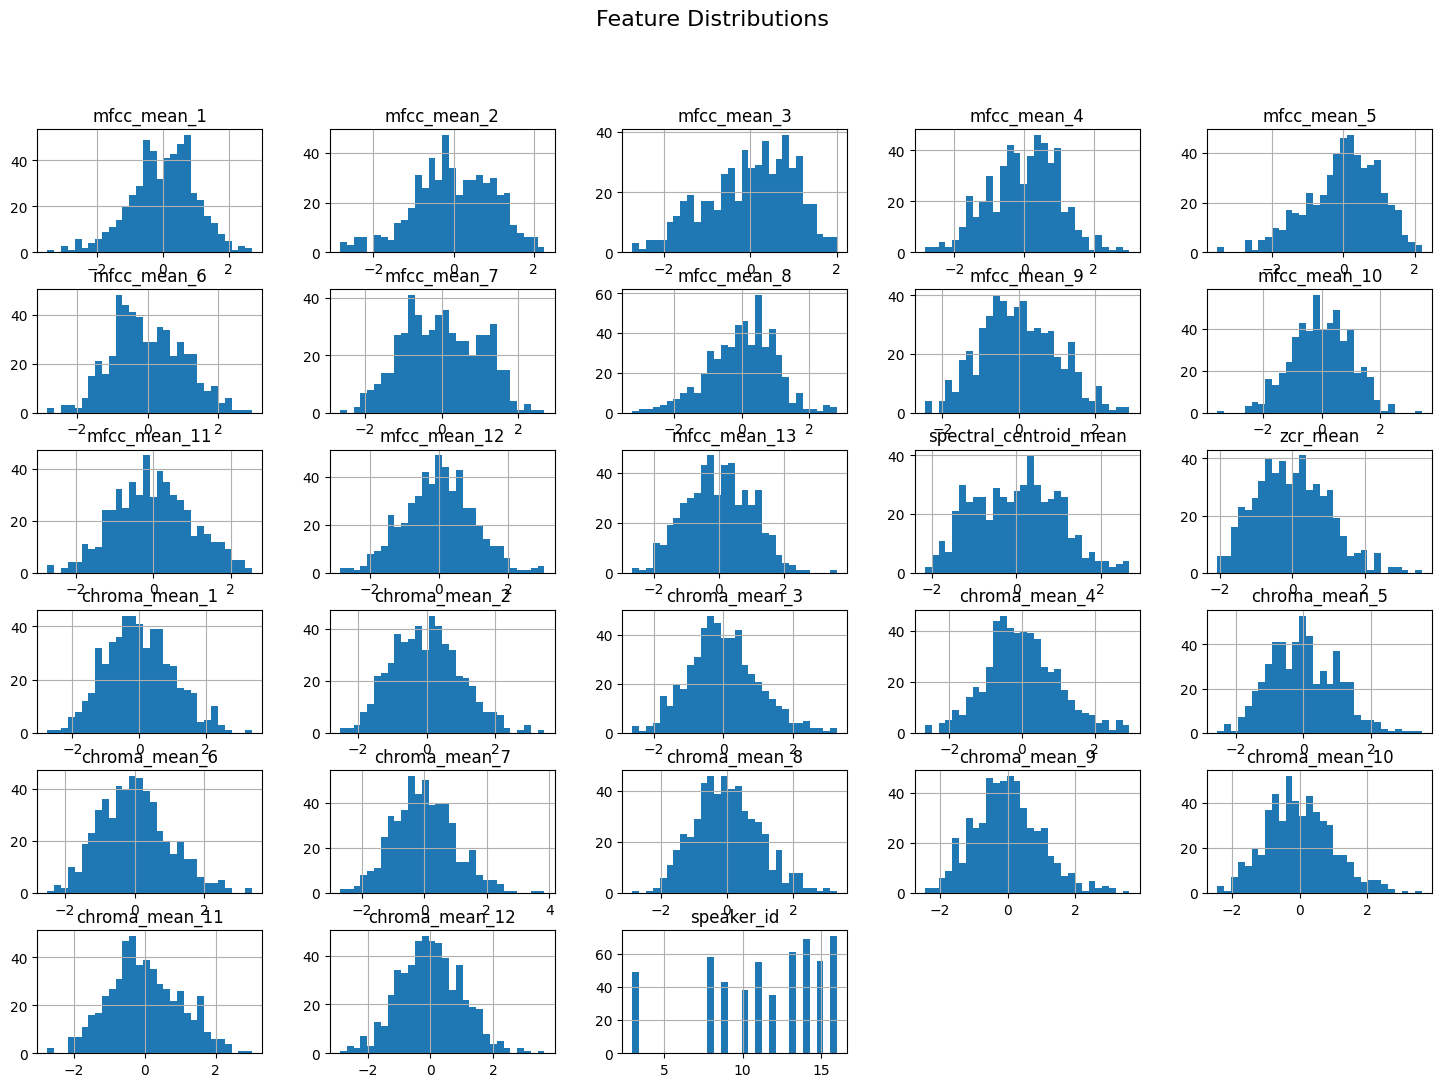

In [ ]:
#Checking the feature distributions: GMM works well with Gaussian-like distributions. If features are heavily skewed, further normalization might be needed.
import seaborn as sns
import matplotlib.pyplot as plt

df.hist(figsize=(18, 12), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


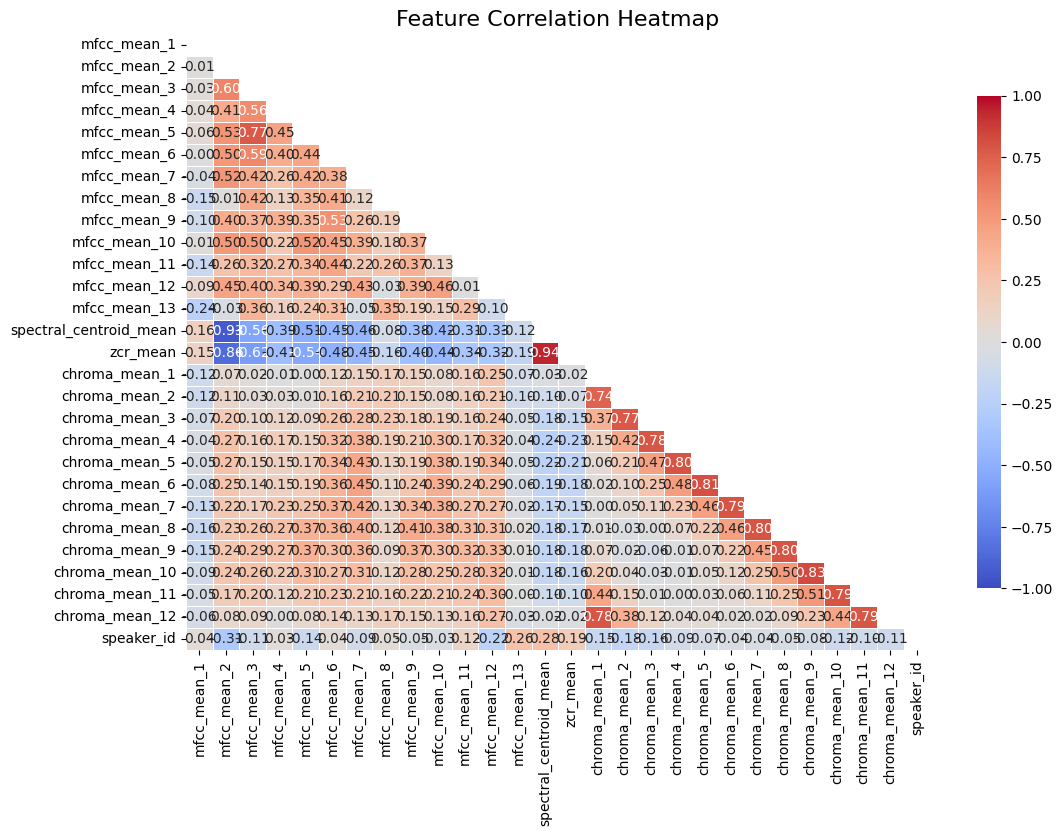

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Compute the correlation matrix
corr = df.corr()

# Mask the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the figure
plt.figure(figsize=(12, 8))

# Create the heatmap with a mask and better color contrast
sns.heatmap(corr, mask=mask, annot=True, cmap="coolwarm", fmt=".2f",
            annot_kws={"size": 10}, vmin=-1, vmax=1, linewidths=0.5,
            cbar_kws={"shrink": 0.8})

plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()


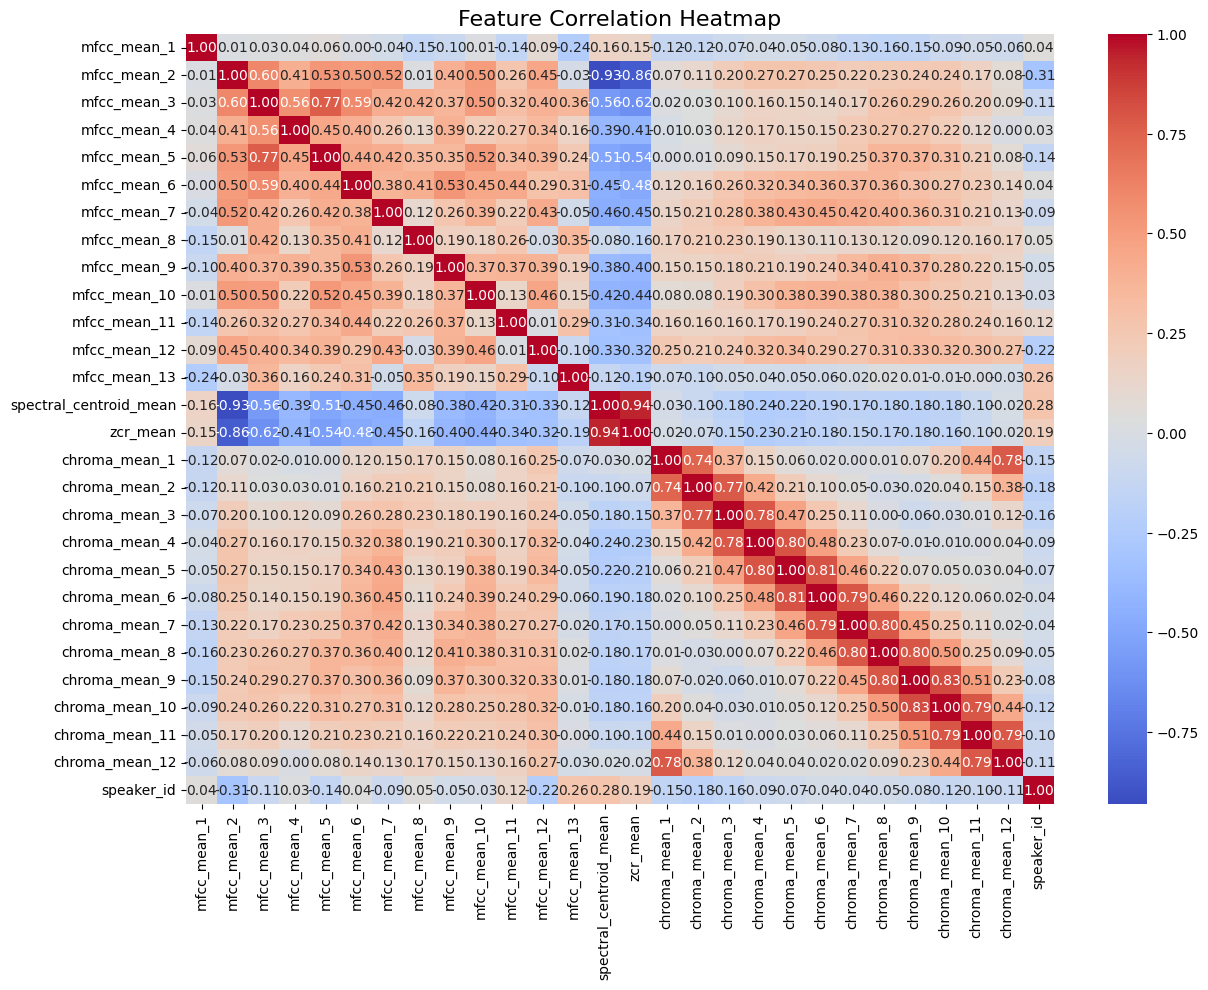

In [ ]:
#Correlation Heatmap: If two features are highly correlated, one might be redundant.
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()


# GMM Model Training

Mathematically, GMM is a weighted sum of multiple Gaussians:

\Mathematically, GMM is a weighted sum of multiple Gaussians:

$$ P(x) = \sum_{k=1}^{K} \pi_k N(x | \mu_k, \sigma_k^2) $$

where: </br>
* $
\ K = \text{number of Gaussian distributions (components)}
$
* $
\pi_k = \text{weight (probability) of each Gaussian (i.e., how much each component contributes)}
$
* $
N(x | \mu_k, \sigma_k^2) = \text{the } k\text{-th Gaussian distribution}
$







## How Does GMM Learn? (Expectation-Maximization Algorithm)

To train a GMM, we need to find the best parameters (mean $\mu$, variance $\sigma^2$, and weights $\pi$) for each Gaussian distribution.

Since we don’t know which data point belongs to which Gaussian, we use an algorithm called Expectation-Maximization (EM):

### Initialization

Start with random values for $\mu$, $\sigma^2$, and $\pi$.

### Expectation Step (E-Step)

Compute the probability that each data point belongs to each Gaussian. This is called the responsibility ($\gamma$):

$$
\gamma_{ik} = \frac{\pi_k N(x_i \mid \mu_k, \sigma_k^2)}{\sum_{j=1}^{K} \pi_j N(x_i \mid \mu_j, \sigma_j^2)}
$$

This tells us: "How likely is this feature from speaker A vs. speaker B?"

### Maximization Step (M-Step)

Update $\mu_k$, $\sigma_k^2$, and $\pi_k$ using the weighted averages based on responsibilities.

### Repeat until convergence

Keep iterating until the changes are very small.

After this, each Gaussian distribution will represent a speaker's voice characteristics.


In [ ]:
# splitting features and labels
X = df.drop(columns=["speaker_id"])  # all columns except the Speaker ID
y = df["speaker_id"]  # Speaker ID as label

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Splitting without Stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Training GMM for Each Speaker :**</br>
We will loop through the speakers and train a GMM model for each one using only the features that belong to that speaker.

**Approach to Find the Best n_components :**</br>
Bayesian Information Criterion (BIC) is a statistical metric used to evaluate the goodness of fit of a model while penalizing for model complexity to avoid overfitting.
Lower BIC scores → Better model</br>
The BIC is defined as:


BIC=−2ln(L)+kln(n)

where:

* L is the likelihood of the model given the data.</br>
* k is the number of parameters in the model.</br>
* n is the number of data points.</br>


In [ ]:
# Function to find the best n_components using BIC
def select_best_n_components(X, max_components=10):
    bic_scores = []
    components_range = range(1, max_components + 1)

    for n in components_range:
        gmm = GaussianMixture(n_components=n, covariance_type='diag', max_iter=200, random_state=42)
        gmm.fit(X)                                  # the covariance_type='diag' param means that the model assumes the features are uncorrelated and only considers the variances of each feature.
        bic_scores.append(gmm.bic(X))               #the max_iter means that the algorithm will perform up to 200 iterations to converge to a solution. If the algorithm converges before reaching 200 iterations, it will stop earlier.

    best_n_bic = components_range[np.argmin(bic_scores)]
    return best_n_bic

In [ ]:
print(y_train.dtype)
print(y_train[:10])  # Show the first 10 values


int64
284    12
347    13
440    16
421    14
149     9
192    11
510    16
365    14
531    16
238    10
Name: speaker_id, dtype: int64


In [ ]:
import pickle #The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
from sklearn.mixture import GaussianMixture
# Dictionary to store trained GMM models for each speaker
gmm_models = {}

# Get unique speaker labels
unique_speakers = np.unique(y_train)

# Train a GMM for each speaker with optimized n_components
for speaker_id in unique_speakers:
    print(f"🔹 Training GMM for Speaker {speaker_id}...")

    # Collect all feature vectors for this speaker
    speaker_features = X_train[y_train == speaker_id].values  # Convert to NumPy


    # Select best number of components
    best_n = select_best_n_components(speaker_features, max_components=10)
    print(f"🔹 Optimal n_components for Speaker {speaker_id}: {best_n}")

    # Train GMM with the best n_components
    gmm = GaussianMixture(n_components=best_n, covariance_type='diag', max_iter=200, random_state=42)
    gmm.fit(speaker_features)

    # Store the trained model
    gmm_models[speaker_id] = gmm

# Save the trained GMM models for future use so we don't have to retrain it everytime
gmm_path = "/content/drive/MyDrive/PFA/gmm_models.pkl"
with open(gmm_path, 'wb') as f:
    pickle.dump(gmm_models, f)

print("✅ GMM Models trained with optimal n_components and saved successfully!")


🔹 Training GMM for Speaker 3...
🔹 Optimal n_components for Speaker 3: 4
🔹 Training GMM for Speaker 8...
🔹 Optimal n_components for Speaker 8: 4
🔹 Training GMM for Speaker 9...
🔹 Optimal n_components for Speaker 9: 10
🔹 Training GMM for Speaker 10...
🔹 Optimal n_components for Speaker 10: 3
🔹 Training GMM for Speaker 11...
🔹 Optimal n_components for Speaker 11: 6
🔹 Training GMM for Speaker 12...
🔹 Optimal n_components for Speaker 12: 10
🔹 Training GMM for Speaker 13...
🔹 Optimal n_components for Speaker 13: 4
🔹 Training GMM for Speaker 14...
🔹 Optimal n_components for Speaker 14: 4
🔹 Training GMM for Speaker 15...
🔹 Optimal n_components for Speaker 15: 2
🔹 Training GMM for Speaker 16...
🔹 Optimal n_components for Speaker 16: 3
✅ GMM Models trained with optimal n_components and saved successfully!


Prediction function




The GMM `score()` function returns the log-likelihood:

$$
\log P(X \mid \theta) = \sum_{i=1}^{N} \log \sum_{k=1}^{K} \pi_k N(x_i \mid \mu_k, \sigma_k^2)
$$

where:</br>
$
\begin{align*}
 P(X \mid \theta) & = \text{Probability of the data } X \text{ given the parameters } \theta \\
\pi_k & = \text{Weight (probability) of each Gaussian component} \\
N(x_i \mid \mu_k, \sigma_k^2) & = \text{The k-th Gaussian distribution with mean } \mu_k \text{ and variance } \sigma_k^2
\end{align*}
$

In [ ]:
def predict_speaker(feature_vector, gmm_models):
    """
    Predicts the speaker given the extracted features.

    Args:
        feature_vector (numpy array): Extracted features from the test sample.
        gmm_models (dict): Dictionary of trained GMM models for each speaker.

    Returns:
        str: The predicted speaker ID.
    """
    log_likelihoods = {speaker: gmm.score(feature_vector.reshape(1, -1)) for speaker, gmm in gmm_models.items()}
    return max(log_likelihoods, key=log_likelihoods.get)
#.reshape(1, -1) ensures that the model gets a 2D array, as expected by GMM.score().

Evaluate the Model

In [ ]:
print(type(y_test))
print(type(X_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
correct_predictions = 0

for i in range(len(X_test)):
    feature_vector = X_test.iloc[i]  # Extracted features from test sample
    true_speaker = y_test.iloc[i]  # True speaker label
    predicted_speaker = predict_speaker(feature_vector.values.reshape(1, -1), gmm_models) #GMM needs the input to be in 2D format for example like this [[0.5, 1.2, 0.8]] and not this [0.5, 1.2, 0.8]

    if predicted_speaker == true_speaker:
        correct_predictions += 1

# Calculate and print accuracy
accuracy = correct_predictions / len(X_test) * 100
print(f"🔹 GMM Test Accuracy: {accuracy:.2f}%")


🔹 GMM Test Accuracy: 55.14%


In [ ]:
# Choose a test sample
sample_index = 42 # a random index of the test sample to check the prediction
feature_vector = X_test.iloc[sample_index]

# Predict the speaker for this sample
predicted_speaker = predict_speaker(feature_vector.values.reshape(1, -1), gmm_models)

# Display the prediction
print(f"Predicted speaker for sample {sample_index}: {predicted_speaker}")

# Optionally, display the true speaker label
true_speaker = y_test.iloc[sample_index] # Get the true speaker label
print(f"True speaker for sample {sample_index}: {true_speaker}")


Predicted speaker for sample 42: 8
True speaker for sample 42: 3


**Another Approach in order to overcome the low accuracy:**
The previous model was trained on imbalanced data (some speakers have way more samples than others) and a random split might cause:


*   The training set to be dominated by some speakers, leading to a biased model.
*   Some speakers to have too few or zero samples in the test set, making evaluation unreliable.</br>
=>Stratification ensures that both X_train and X_test contain roughly the same percentage of each speaker as in the full dataset.</br>
With stratify=y, it makes sure that if 20% of the dataset is allocated for testing, each speaker gets the same 20% split:</br>
for example **for speaker_id=12** on 35 samples with stratify
train : 28 samples  test: 7 samples


In [ ]:
#Splitting with Startification (for balanced classes)
X_train_strat, X_test_strat, y_train_strat, y_test_strat = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
import pickle #The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
from sklearn.mixture import GaussianMixture
# Dictionary to store trained GMM models for each speaker
gmm_models_strat = {}

# Get unique speaker labels
unique_speakers = np.unique(y_train_strat)

# Training a GMM for each speaker with optimized n_components
for speaker_id in unique_speakers:
    print(f"🔹 Training GMM for Speaker {speaker_id}...")

    # Collecting all feature vectors for this speaker
    speaker_features = X_train_strat[y_train_strat == speaker_id].values

    # Selecting best number of components using the function build previously
    best_n = select_best_n_components(speaker_features, max_components=10)
    print(f"🔹 Optimal n_components for Speaker {speaker_id}: {best_n}")

    # Training GMM with the best n_components
    gmm = GaussianMixture(n_components=best_n, covariance_type='diag', max_iter=200, random_state=42)
    gmm.fit(speaker_features)

    # Storing the trained model
    gmm_models_strat[speaker_id] = gmm

# Save the trained GMM models for future use so we don't have to retrain it everytime
gmm_path = "/content/drive/MyDrive/PFA/gmm_models_strat.pkl"
with open(gmm_path, 'wb') as f:
    pickle.dump(gmm_models_strat, f)

print("✅ GMM Models trained with optimal n_components and saved successfully!")


🔹 Training GMM for Speaker 3...
🔹 Optimal n_components for Speaker 3: 6
🔹 Training GMM for Speaker 8...
🔹 Optimal n_components for Speaker 8: 8
🔹 Training GMM for Speaker 9...
🔹 Optimal n_components for Speaker 9: 7
🔹 Training GMM for Speaker 10...
🔹 Optimal n_components for Speaker 10: 10
🔹 Training GMM for Speaker 11...
🔹 Optimal n_components for Speaker 11: 2
🔹 Training GMM for Speaker 12...
🔹 Optimal n_components for Speaker 12: 10
🔹 Training GMM for Speaker 13...
🔹 Optimal n_components for Speaker 13: 5
🔹 Training GMM for Speaker 14...
🔹 Optimal n_components for Speaker 14: 3
🔹 Training GMM for Speaker 15...
🔹 Optimal n_components for Speaker 15: 2
🔹 Training GMM for Speaker 16...
🔹 Optimal n_components for Speaker 16: 2
✅ GMM Models trained with optimal n_components and saved successfully!


In [ ]:
def predict_speaker(feature_vector, gmm_models_strat):
    """
    Predicts the speaker given the extracted features.

    Args:
        feature_vector (numpy array): Extracted features from the test sample.
        gmm_models (dict): Dictionary of trained GMM models for each speaker.

    Returns:
        str: The predicted speaker ID.
    """
    log_likelihoods = {speaker: gmm.score(feature_vector.reshape(1, -1)) for speaker, gmm in gmm_models_strat.items()}
    return max(log_likelihoods, key=log_likelihoods.get)
#.reshape(1, -1) ensures that the model gets a 2D array, as expected by GMM.score().

In [ ]:
correct_predictions = 0

for i in range(len(X_test_strat)):
    feature_vector = X_test_strat.iloc[i]  # Extracted features from test sample
    true_speaker = y_test_strat.iloc[i]  # True speaker label
    predicted_speaker = predict_speaker(feature_vector.values.reshape(1, -1), gmm_models_strat) #GMM needs the input to be in 2D format for example like this [[0.5, 1.2, 0.8]] and not this [0.5, 1.2, 0.8]

    if predicted_speaker == true_speaker:
        correct_predictions += 1

# Calculate and print accuracy
accuracy = correct_predictions / len(X_test_strat) * 100
print(f"🔹 GMM Test Accuracy: {accuracy:.2f}%")


🔹 GMM Test Accuracy: 65.42%


In [ ]:
# Choose a test sample
sample_index = 42 # a random index of the test sample to check the prediction
feature_vector = X_test_strat.iloc[sample_index]

# Predict the speaker for this sample
predicted_speaker = predict_speaker(feature_vector.values.reshape(1, -1), gmm_models_strat)

# Display the prediction
print(f"Predicted speaker for sample {sample_index}: {predicted_speaker}")

# Optionally, display the true speaker label
true_speaker = y_test_strat.iloc[sample_index] # Get the true speaker label
print(f"True speaker for sample {sample_index}: {true_speaker}")


Predicted speaker for sample 42: 11
True speaker for sample 42: 11


In [ ]:
# Assuming y_test_strat is your Series and 'speaker_id_to_find' is the speaker ID you're looking for
speaker_id_to_find = 10  # Replace with the actual speaker ID you want to filter

# Filter indices with the specified speaker ID
filtered_indices = X_test_strat[y_test_strat == speaker_id_to_find].index

# Print the indices
print("Row indices of samples with speaker_id =", speaker_id_to_find, ":", filtered_indices.tolist())


Row indices of samples with speaker_id = 10 : [184, 175, 198, 159, 151, 140, 153, 170]


In [ ]:
# Check the indices of y_test_strat
print(y_test_strat.index)


Index([216, 263, 392, 165, 534, 304, 482, 525, 511, 184,
       ...
        79, 275, 463, 407,  10, 241, 237, 253, 104,  38],
      dtype='int64', length=107)


Confirming the struggle to find speaker 10.

In [ ]:
# Indices of samples with speaker_id = 10
speaker_id_to_find = 10
indices_of_speaker = [184, 175, 198, 159, 151, 140, 153, 170]

# Choose a test sample
sample_index = 159  # Example index
if sample_index in indices_of_speaker:
    if sample_index in X_test_strat.index:
        feature_vector = X_test_strat.loc[sample_index]

        # Predict the speaker for this sample
        predicted_speaker = predict_speaker(feature_vector.values.reshape(1, -1), gmm_models_strat)

        # Display the prediction
        print(f"Predicted speaker for sample {sample_index}: {predicted_speaker}")


        true_speaker = y_test_strat.loc[sample_index]
        print(f"True speaker for sample {sample_index}: {true_speaker}")
    else:
        print(f"sample_index {sample_index} is not present in X_test_strat.")
else:
    print(f"sample_index {sample_index} is not associated with speaker_id {speaker_id_to_find}.")


Predicted speaker for sample 159: 15
True speaker for sample 159: 10


In [ ]:
# Choose a test sample
sample_index = 84 # a random index of the test sample to check the prediction
feature_vector = X_test_strat.iloc[sample_index]

# Predict the speaker for this sample
predicted_speaker = predict_speaker(feature_vector.values.reshape(1, -1), gmm_models_strat)

# Display the prediction
print(f"Predicted speaker for sample {sample_index}: {predicted_speaker}")

# Optionally, display the true speaker label
true_speaker = y_test_strat.iloc[sample_index] # Get the true speaker label
print(f"True speaker for sample {sample_index}: {true_speaker}")


Predicted speaker for sample 84: 3
True speaker for sample 84: 3


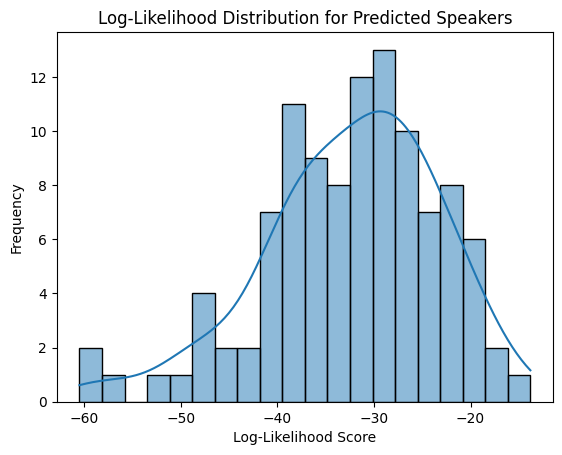

In [ ]:
import seaborn as sns

log_likelihoods = [gmm_models_strat[predict_speaker(X_test_strat.iloc[i].values.reshape(1, -1), gmm_models_strat)].score(X_test_strat.iloc[i].values.reshape(1, -1))
                   for i in range(len(X_test_strat))]

sns.histplot(log_likelihoods, kde=True, bins=20)
plt.xlabel("Log-Likelihood Score")
plt.ylabel("Frequency")
plt.title("Log-Likelihood Distribution for Predicted Speakers")
plt.show()


we recognize multiple peaks.</br>
most scores are high.</br>
the distribution is kind of centered.</br>

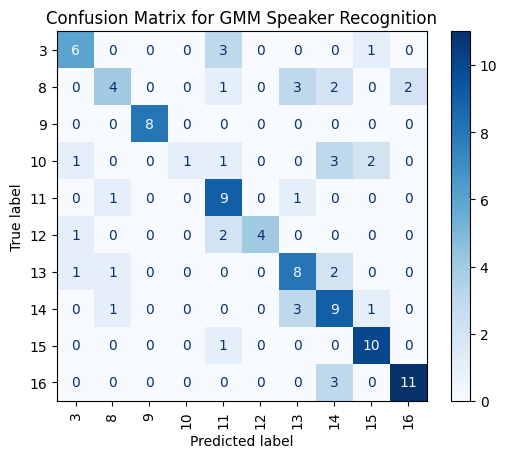

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Collect true and predicted speaker labels
true_labels = [y_test_strat.iloc[i] for i in range(len(X_test_strat))]
predicted_labels = [predict_speaker(X_test_strat.iloc[i].values.reshape(1, -1), gmm_models_strat) for i in range(len(X_test_strat))]

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=list(set(true_labels)))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(set(true_labels)))
disp.plot(cmap="Blues", xticks_rotation="vertical")
plt.title("Confusion Matrix for GMM Speaker Recognition")
plt.show()


On the diagonal we see the correctly predicted labels, we notice that the most values are on the diagonal so our model is doing ok.

In [ ]:
total_predictions = np.sum(cm)
print("Total samples in confusion matrix:", total_predictions)


Total samples in confusion matrix: 107


In [ ]:
print(len(y_test_strat))

107


In [ ]:
per_speaker_accuracy = cm.diagonal() / cm.sum(axis=1)
print("Per-speaker accuracy:", per_speaker_accuracy)


Per-speaker accuracy: [0.6        0.33333333 1.         0.125      0.81818182 0.57142857
 0.66666667 0.64285714 0.90909091 0.78571429]


👉 The good ones:

Speaker 9 → 100% accuracy!  (Perfect classification)</br>
Speaker 16 → 91% accuracy! (Almost perfect)</br>
Speaker 12 → 82% accuracy → Solid performance!</br>
Speaker 15 → 78% accuracy → Also solid!</br>
👉 The ones in danger:

Speaker 10 → 12.5% accuracy  (DISASTER. Basically random guessing.)
Speaker 8 → 33% accuracy  (Very bad, struggling hard)</br>
🚨 Speaker 10 is getting completely confused with other speakers. 🚨



training the model with only MFCCs

In [ ]:
import librosa
import numpy as np
import os
import pandas as pd

# Function to extract MFCCs from an audio file
def extract_mfcc(file_path, n_mfcc=13):
    y, sr = librosa.load(file_path, sr=None)  # Load audio file
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)  # Extract MFCCs
    mfccs_mean = np.mean(mfccs, axis=1)  # Take mean across time axis
    return mfccs_mean  # Returns a feature vector

# Lists to store features and labels
features = []
labels = []

# Define the list of audio files
audio_files = [os.path.join(audio_path, f)
               for f in os.listdir(audio_path)
               if f.endswith(('.wav', '.mp3'))]

# Process each audio file
for file in audio_files:
    speaker_id = os.path.basename(file)[:2]  # Extract speaker ID (first 2 characters)
    feature_vector = extract_mfcc(file)  # Extract MFCC features

    features.append(feature_vector)
    labels.append(speaker_id)

# Convert to DataFrame
mfcc_columns = [f'mfcc_{i+1}' for i in range(13)]  # Column names: mfcc_1 to mfcc_13
mfcc_df = pd.DataFrame(features, columns=mfcc_columns)

# Add speaker column at the end
mfcc_df['speaker'] = labels

# Save dataset
mfcc_df.to_csv("mfcc_features.csv", index=False)

print("✅ MFCC features extracted and dataset saved successfully!")

✅ MFCC features extracted and dataset saved successfully!


In [ ]:
# Load the MFCC dataset
df = pd.read_csv(base_path+"mfcc_features.csv")

In [ ]:
X=df.drop(columns=["speaker"])
y=df["speaker"]

In [ ]:
from sklearn.model_selection import train_test_split
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("✅ Data loaded and split successfully!")


✅ Data loaded and split successfully!


In [ ]:
df.head()

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,speaker
0,-172.55374,107.392105,-1.648489,40.375576,-1.076226,1.867746,-14.847213,-15.405208,-12.080793,1.611496,-8.296159,1.621329,-7.712978,3
1,-286.74410,105.287330,17.157164,27.134735,-4.888976,14.164309,-1.328477,-8.860144,-3.571207,6.688750,-2.331926,-1.188792,-1.275977,3
2,-164.92938,50.456474,-31.354600,8.364175,-20.054188,-2.518735,-22.392443,-12.720355,-20.734863,0.433688,-8.524338,-6.096301,-6.871278,3
3,-158.47044,47.685673,-4.230317,18.998533,-10.414630,-0.972392,-19.600882,-4.381253,-21.823938,-2.128159,-12.936885,-4.061139,-5.444458,3
4,-185.20023,40.159214,-29.243916,17.208820,-20.803268,-12.094015,-18.132725,-11.509648,-26.147081,-6.585946,-11.706835,-6.755848,-12.301774,3


In [ ]:
import pickle
import numpy as np
from sklearn.mixture import GaussianMixture

# Dictionary to store trained GMM models for each speaker
gmm_models_MFCC = {}

# Get unique speaker labels
unique_speakers = np.unique(y_train)

# Train a GMM for each speaker
for speaker_id in unique_speakers:
    print(f"🔹 Training GMM for Speaker {speaker_id}...")

    # Extract MFCC features for this speaker
    speaker_features = X_train[y_train == speaker_id]

   # Select best number of components
    best_n = select_best_n_components(speaker_features, max_components=10)
    print(f"🔹 Optimal n_components for Speaker {speaker_id}: {best_n}")

    # Train GMM with chosen n_components
    gmm = GaussianMixture(n_components=best_n, covariance_type='diag', max_iter=200, random_state=42)
    gmm.fit(speaker_features)

    # Store the trained model
    gmm_models_MFCC[speaker_id] = gmm

# Save the trained GMM models for future use
gmm_path = "/content/drive/MyDrive/PFA/gmm_models_MFCC.pkl"
with open(gmm_path, 'wb') as f:
    pickle.dump(gmm_models_MFCC, f)

print("✅ GMM Models trained on MFCC dataset and saved successfully!")


🔹 Training GMM for Speaker 3...
🔹 Optimal n_components for Speaker 3: 10
🔹 Training GMM for Speaker 8...
🔹 Optimal n_components for Speaker 8: 9
🔹 Training GMM for Speaker 9...
🔹 Optimal n_components for Speaker 9: 10
🔹 Training GMM for Speaker 10...
🔹 Optimal n_components for Speaker 10: 1
🔹 Training GMM for Speaker 11...
🔹 Optimal n_components for Speaker 11: 2
🔹 Training GMM for Speaker 12...
🔹 Optimal n_components for Speaker 12: 10
🔹 Training GMM for Speaker 13...
🔹 Optimal n_components for Speaker 13: 2
🔹 Training GMM for Speaker 14...
🔹 Optimal n_components for Speaker 14: 3
🔹 Training GMM for Speaker 15...
🔹 Optimal n_components for Speaker 15: 3
🔹 Training GMM for Speaker 16...
🔹 Optimal n_components for Speaker 16: 5
✅ GMM Models trained on MFCC dataset and saved successfully!


In [ ]:
def predict_speaker(feature_vector, gmm_models):
    """
    Predicts the speaker given the extracted features.

    Args:
        feature_vector (numpy array): Extracted features from the test sample.
        gmm_models (dict): Dictionary of trained GMM models for each speaker.

    Returns:
        str: The predicted speaker ID.
    """
    log_likelihoods = {speaker: gmm.score(feature_vector.reshape(1, -1)) for speaker, gmm in gmm_models.items()}
    return max(log_likelihoods, key=log_likelihoods.get)
#.reshape(1, -1) ensures that the model gets a 2D array, as expected by GMM.score().

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

🔹 GMM Test Accuracy: 66.36%

🔹 Classification Report:
              precision    recall  f1-score   support

           3       1.00      0.40      0.57        10
           8       0.89      0.67      0.76        12
           9       1.00      0.12      0.22         8
          10       0.38      0.75      0.50         8
          11       0.50      0.55      0.52        11
          12       1.00      0.14      0.25         7
          13       0.55      1.00      0.71        12
          14       0.71      0.86      0.77        14
          15       0.69      0.82      0.75        11
          16       1.00      0.86      0.92        14

    accuracy                           0.66       107
   macro avg       0.77      0.62      0.60       107
weighted avg       0.77      0.66      0.64       107



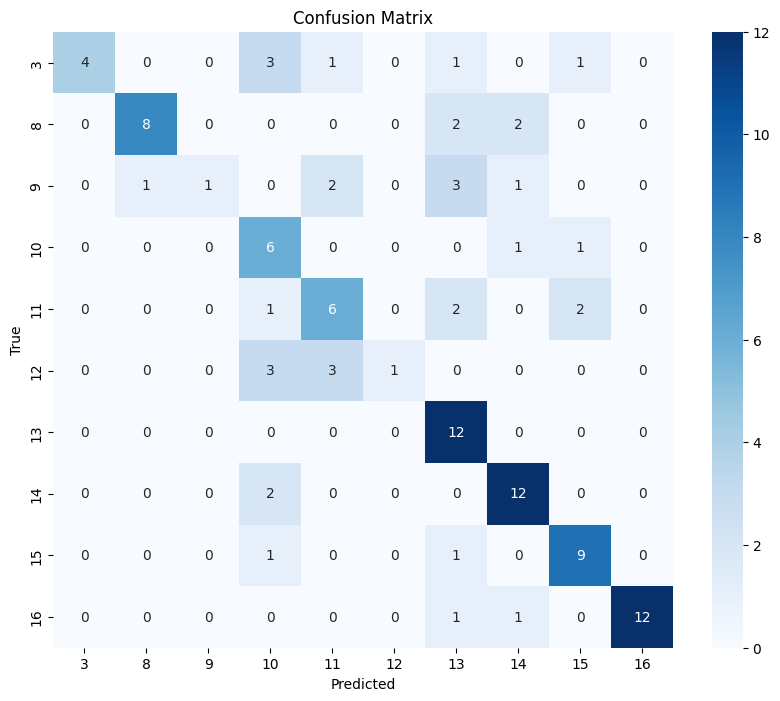

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Make predictions on the test set
predictions = []
for i in range(len(X_test)):  # Loop over all test samples
    feature_vector = X_test.iloc[i]  # Extract features for test sample
    predicted_speaker = predict_speaker(feature_vector.values.reshape(1, -1), gmm_models_MFCC)
    predictions.append(predicted_speaker)  # Append the prediction

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)  # Compare true labels (y_test) with predictions
print(f"🔹 GMM Test Accuracy: {accuracy * 100:.2f}%")

# Print detailed classification report (precision, recall, F1-score, etc.)
print("\n🔹 Classification Report:")
print(classification_report(y_test, predictions))

# Plot confusion matrix to visualize prediction performance
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Compute per-speaker accuracy
per_speaker_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

# Get unique speaker labels
speaker_labels = np.unique(y_test)  # Extract unique speakers from test labels

# Convert to a readable format
accuracy_df = pd.DataFrame({'Speaker': speaker_labels, 'Accuracy': per_speaker_accuracy})

# Display the results
print("🔹 Per-Speaker Accuracy:")
print(accuracy_df.sort_values(by="Accuracy", ascending=False))  # Sorted for better readability


🔹 Per-Speaker Accuracy:
   Speaker  Accuracy
6       13  1.000000
7       14  0.857143
9       16  0.857143
8       15  0.818182
3       10  0.750000
1        8  0.666667
4       11  0.545455
0        3  0.400000
5       12  0.142857
2        9  0.125000


using only the speakers who have more than 50 audios

In [ ]:
#Snippet of code that needs optimisation for the image dataset generation that we will be working on
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Path to audio files
audio_files_path = "/content/drive/MyDrive/wav"
output_dir = "/content/drive/MyDrive/spectrograms"

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Function to generate and save spectrogram images
def save_spectrogram_images(audio_path, speaker_id, output_dir):
    # Load audio
    y, sr = librosa.load(audio_path, sr=None)

    # Create speaker directory
    speaker_dir = os.path.join(output_dir, speaker_id)
    os.makedirs(speaker_dir, exist_ok=True)

    # 1. Spectrogram (STFT)
    plt.figure(figsize=(10, 4))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Spectrogram - {os.path.basename(audio_path)}")
    plt.savefig(os.path.join(speaker_dir, f"{os.path.basename(audio_path)}_spectrogram.png"))
    plt.close()

    # Mel Spectrogram
    plt.figure(figsize=(10, 4))
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)  # Correct conversion
    librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Mel Spectrogram - Speaker {speaker_id}")

    # 3. MFCC Spectrogram
    plt.figure(figsize=(10, 4))
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    librosa.display.specshow(mfcc, sr=sr, x_axis='time')
    plt.colorbar()
    plt.title(f"MFCC Spectrogram - {os.path.basename(audio_path)}")
    plt.savefig(os.path.join(speaker_dir, f"{os.path.basename(audio_path)}_mfcc.png"))
    plt.close()

# Process each audio file
for file in os.listdir(audio_files_path):
    if file.endswith(".wav"):
        speaker_id = os.path.basename(file)[:2]  # Extract speaker ID (first 2 characters)
        file_path = os.path.join(audio_files_path, file)
        save_spectrogram_images(file_path, speaker_id, output_dir)

print("✅ Spectrogram images saved for all audio files.")
